<a href="https://colab.research.google.com/github/tsaniarisqi/PCVK_Matrikulasi_2022/blob/main/modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


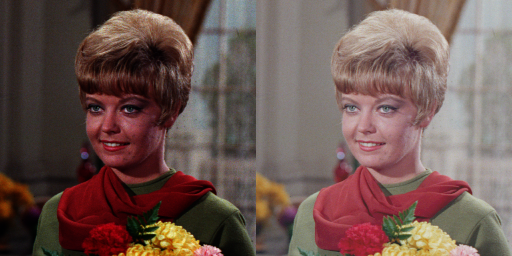

In [5]:
#No 1
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

image = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
gamma_image = np.zeros(image.shape, image.dtype)

# Akses per pixel
for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      gamma_image[y,x,c] = np.clip(225 * pow(image[y,x,c]/255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((image, gamma_image))
cv2_imshow(final_frame)

 Image Depth Simulation : 
-------------------------------------
Masukkan nilai Image Depth  : 2


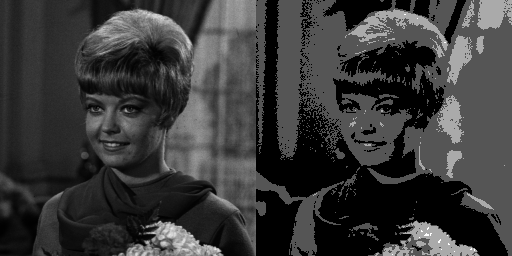

In [42]:
#No 2
print(' Image Depth Simulation : ')
print('-------------------------------------')
try: 
 depth = int(input('Masukkan nilai Image Depth  : '))
except ValueError:
 print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
img_depth = np.zeros(img.shape, img.dtype)

level = 255/((2**depth)-1)

for x in range(img.shape[0]):
  for y in range(img.shape[1]):
      clip = round((img[x,y]/level))*level
      img_depth[x,y] = np.clip(clip, 0, 255)

frame = cv.hconcat((img, img_depth))
cv2_imshow(frame)

In [20]:
#No 3
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

Nilai PSNR adalah 27.641930593504572 (dB)


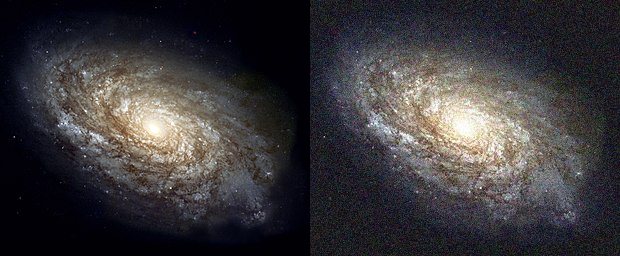

In [45]:
dst = cv_img[0]
noise_number = 2  # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

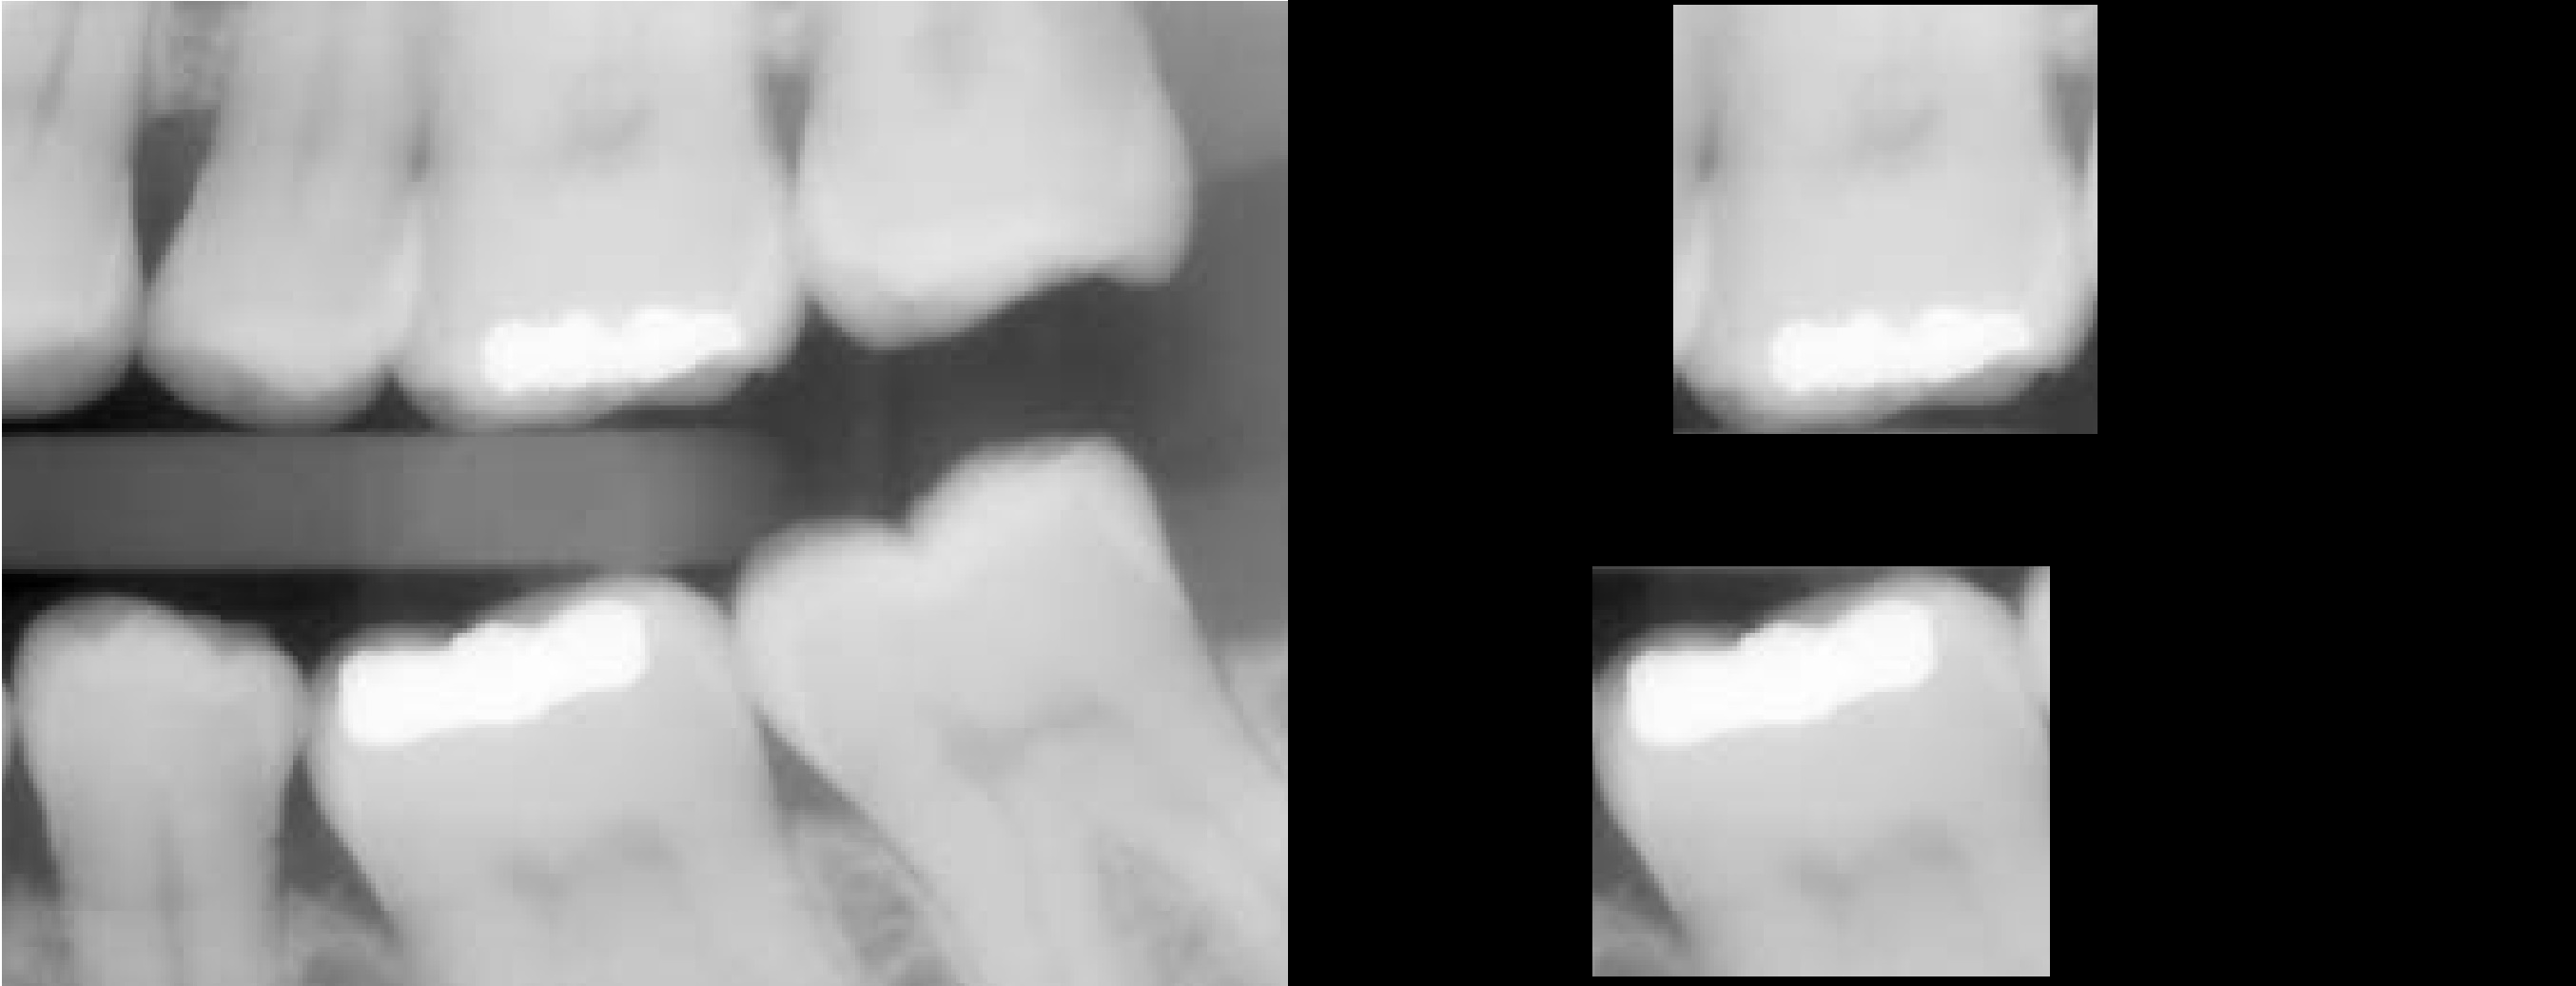

In [8]:
#No 4
image = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.rectangle(mask, pt1=(320,595), pt2=(800,1025), color=(255,255,255), thickness = -1)

result = image & mask

mask1 = cv.rectangle(mask,pt1=(405,5), pt2=(850,455), color=(255,255,255), thickness=-1)

result = image & mask1

final_frame = cv.hconcat((image, result))
cv2_imshow(final_frame)

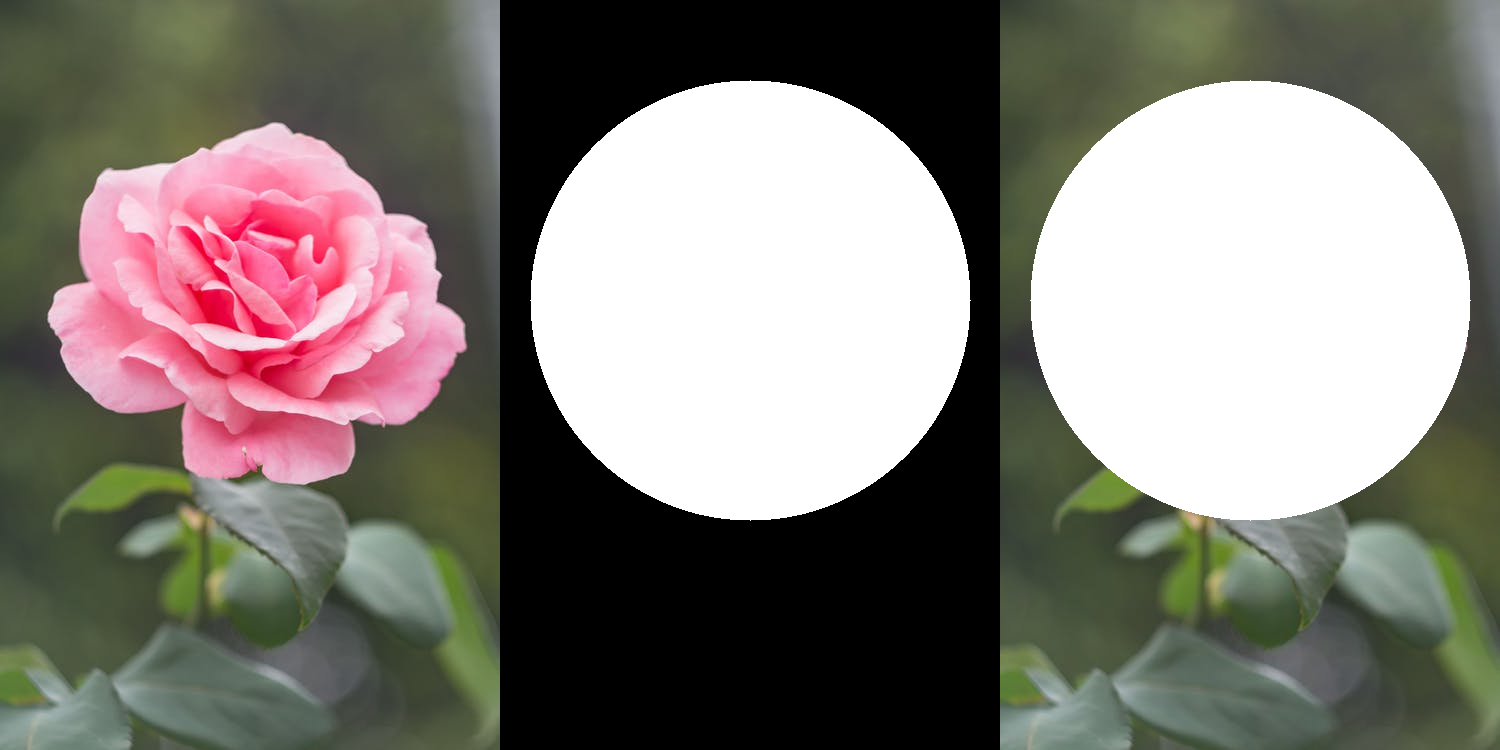

In [21]:
#No 5
#Operator Or (gabungan A dan B)
img = cv.imread('/content/drive/MyDrive/PCVK/Images/rose_pink.png')

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (250, 300), 220, (255,255,255), -1)

masked = img | mask

simp_frame = cv.hconcat((img, mask, masked))
cv2_imshow(simp_frame)

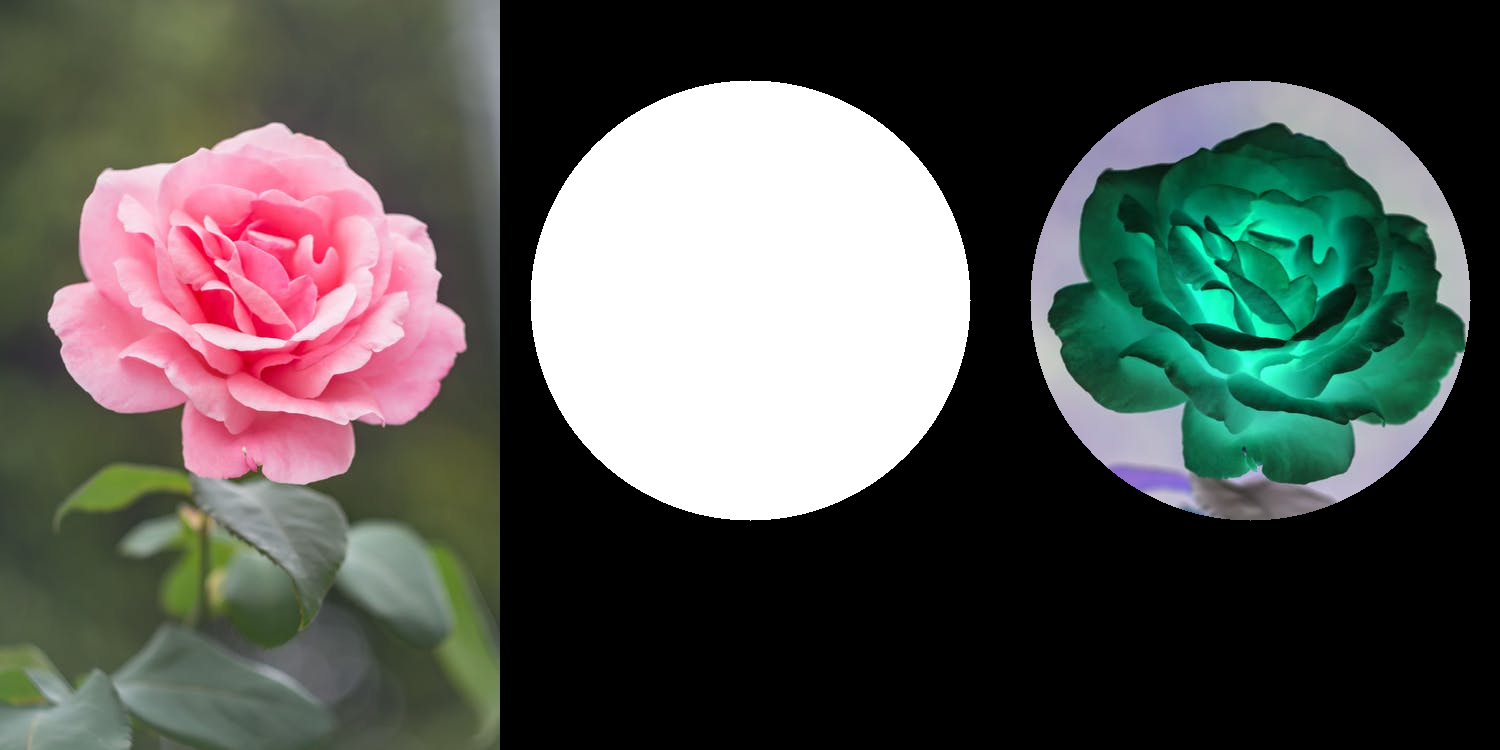

In [16]:
#Operator Not (gabungan A dan B)
img = cv.imread('/content/drive/MyDrive/PCVK/Images/rose_pink.png')

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (250, 300), 220, (255,255,255), -1)

masked = ~img & mask

simp_frame = cv.hconcat((img, mask, masked))
cv2_imshow(simp_frame)

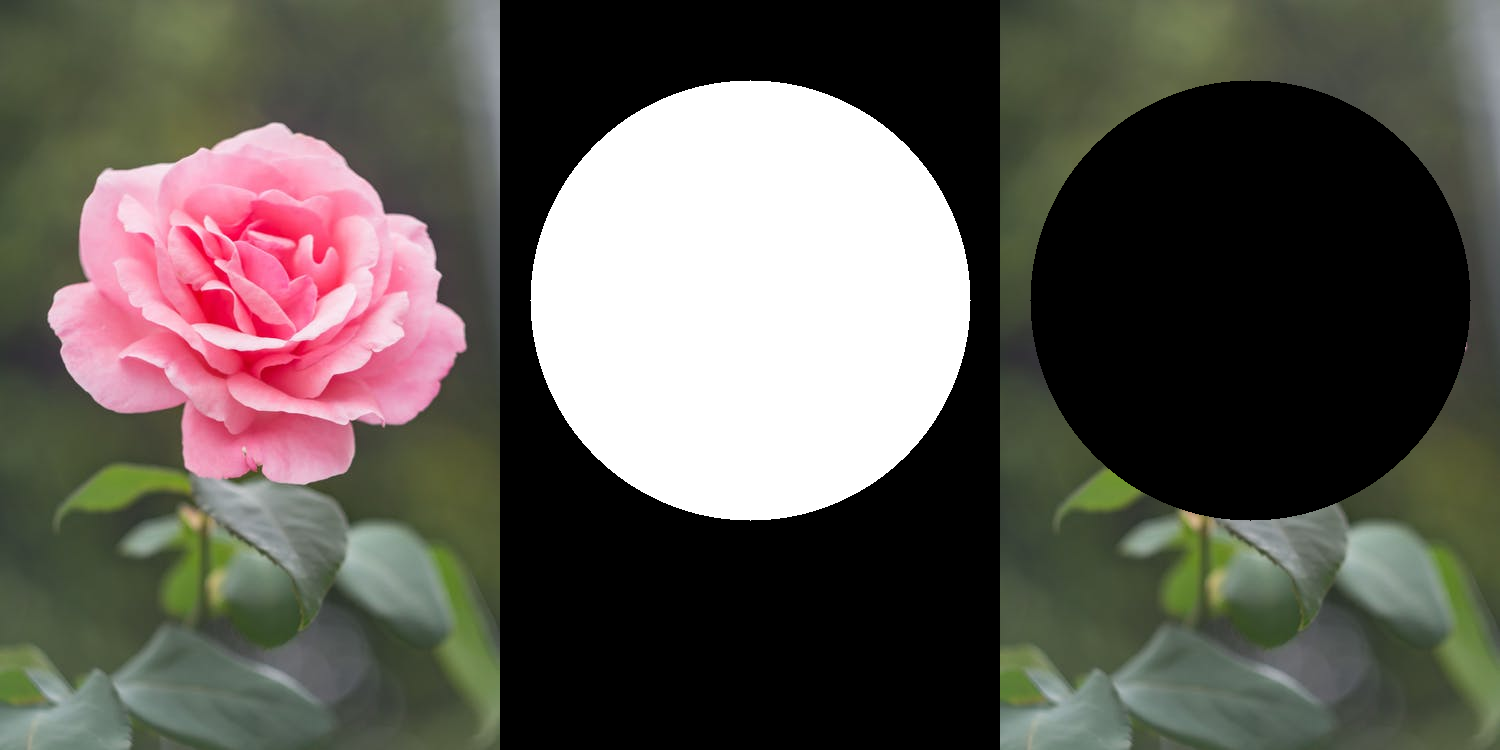

In [12]:
#Operator Nand (A aja yang tampil)
img = cv.imread('/content/drive/MyDrive/PCVK/Images/rose_pink.png')

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (250, 300), 220, (255,255,255), -1)

masked = img & ~mask

result = cv.hconcat((img, mask, masked))
cv2_imshow(result)

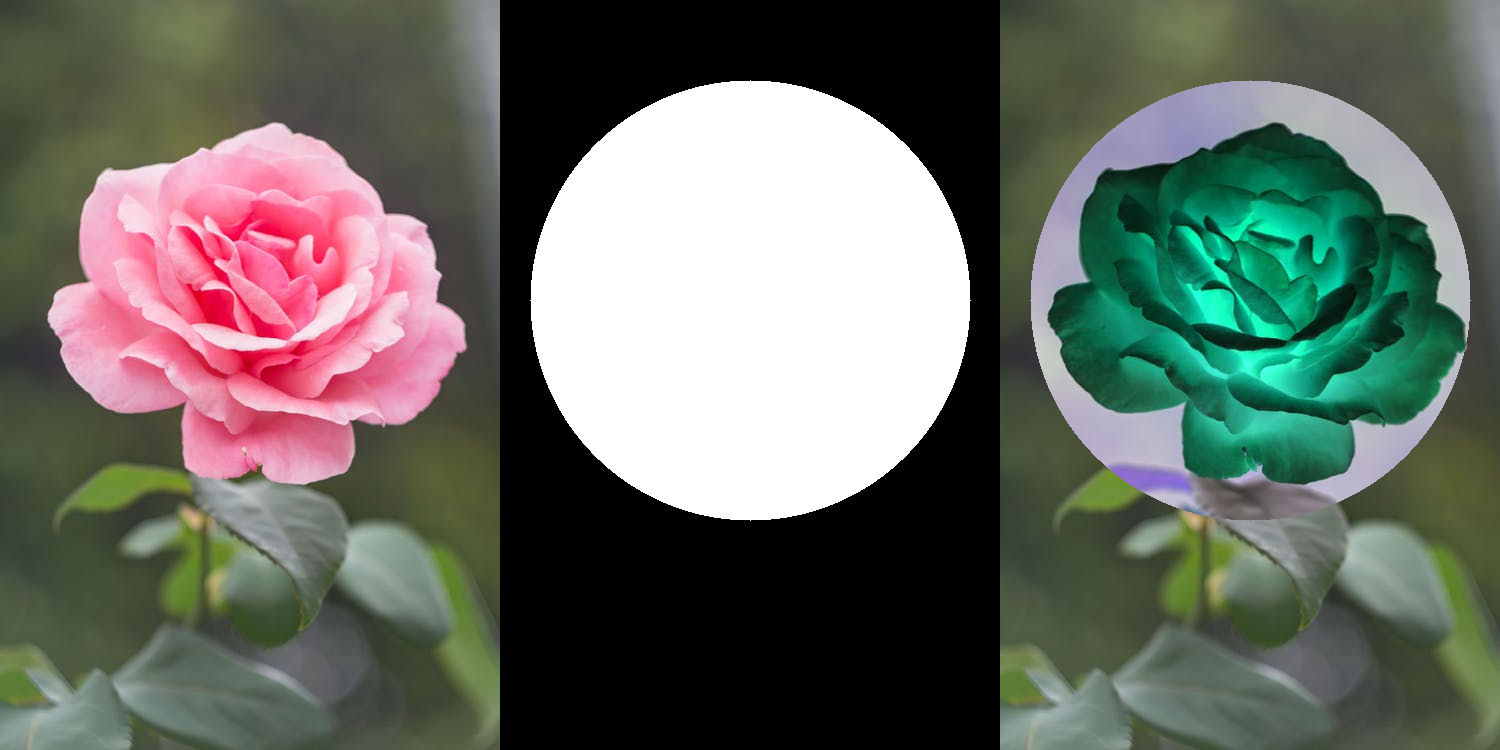

In [11]:
#Operator XOR (Gabungan A dan B selain irisan)
img = cv.imread('/content/drive/MyDrive/PCVK/Images/rose_pink.png')

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (250, 300), 220, (255,255,255), -1)

masked = img ^ mask

result = cv.hconcat((img, mask, masked))
cv2_imshow(result)